In [1]:
import pandas as pd
import os

data = pd.read_csv(os.getcwd()+'/data/BNP_data/train.csv')

# Fill NA values accordingly
from sklearn.base import TransformerMixin
import numpy as np

class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
data = DataFrameImputer().fit_transform(data)

# Convert string values to numeric
from sklearn import preprocessing

criteria = data.dtypes == object
object_columns = data[criteria.index[criteria]].columns

le = preprocessing.LabelEncoder()
for col in object_columns:
    data[col] = le.fit_transform(data[col])

# Cross-validation
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(data.drop('target', axis=1), data['target'], \
    test_size=0.33, random_state=5)

In [2]:
def logloss(y, p):
    N = len(y)
    if len(p) != N:
        return print('Vectors of unequal length')
    
    p = np.array([max(min(p_i, 1-10**(-15)), 10**(-15)) for p_i in p])
    
    summand = y*np.log(p)+(1-y)*np.log(1-p)
    ll = -sum(summand)/N
    return ll

In [46]:
from sklearn.naive_bayes import GaussianNB

col_list = ['v3', 'v24', 'v30', 'v38', 'v47', 'v62', 'v66', 'v71', 'v72', 'v74', 'v129']
gnb = GaussianNB()
Y_train_pred = gnb.fit(X_train[col_list], Y_train).predict_proba(X_train[col_list])

In [48]:
logloss(Y_train.values, y1)

1.294685499707221

In [19]:
[max(min(p_i, 1-10**(-15)), 10**(-15)) for p_i in Y_train_pred]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
y0, y1 = zip(*Y_train_pred)

In [32]:
Y_train.values

array([1, 0, 1, ..., 1, 1, 0])

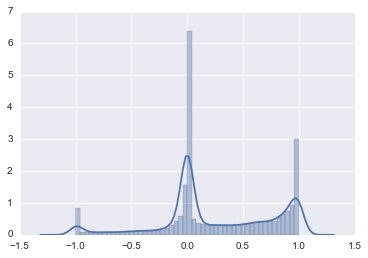

In [43]:
%matplotlib inline
import seaborn as sns

sns.distplot(Y_train.values - y1, norm_hist=True)

In [39]:
max(Y_train.values - y1)

1.0